# Seaborn for Data Visualization

### Table of Contents
- [Introduction](#Introduction)

     - [Matplotlib](#Matplotlib)
     - [Seaborn](#Seaborn)
    
- [Environment Setup](#Environment-Setup)

- [Aesthetics](#Aesthetics)

- [Ease Of Use](#Ease-Of-Use)
    - [Easier Categorical Plots](#Easier-Categorical-Plots)
- [Statistical Estimations](#Statistical-Estimations-Made-Simple)
    - [CI Plotting](#CI-Plotting)
    - [Regression Plotting](#Regression-Plotting)
- [More Plots](#More-Plots!)
    - [Pair Plots](#Pair-Plots)
    - [Histograms and Probability](#Histograms-and-Probability-Distributions)
    - [Box Plots and Violin Plots](#Box-Plots-and-Violin-Plots)
- [Further Reading](#Further-Reading)
- [References](#References)




### Introduction

Data Visualization is the cornerstone of Data Science. We as humans are naturally more receptive to things that we can see with our eyes and when you are dealing with a lot of messy data, like I am sure you will have to as Data Scientists, being able to visualize your data in a simple, effective and beautiful manner becomes extremely important. So much so that most of the time, you and your stakeholders would depend on visual representations than on a machine learning model to make sense out of that data you've been working on.

Now that you know why you need to visulaize your data the next step is to find out how to do that? There are a plethora of visualization tools available in the market. Although most of them are paid , and have a fair amount of features to work with, we as python developers can can utilize libraries available to us and build beautiful visualizations to both present the data(for stakeholders) and explore the data(for data scientists). 

For the purpose of this tutorial we are going to look at Seaborn and we are going to spend some time on finding out how is it different than Matplotlib.

#### Matplotlib

Matplotlib has been around since 2003 and has gone through quite a lot of changes since it first launched. It was designed to be similar to MATLAB's plotting interface(hence the name). Although quite powerful, it can be quite difficult to use and data scientists have the below complaints:
- Matplotlib plots plotted with default parameters are not aesthetically pleasing
- Matplotlib is designed to be extremely low level. Although effective data visualizations are possible using Matplotlib, they often require a lot of extra code which makes the program clunkier and the data scientist's job harder
- Matplotlib predates pandas by over a decade and hence it was not designed to be directly used with Dataframes and Datasets as a whole. And since we use pandas for most of our exploratory tasks, this poses a problem

#### Seaborn

Seaborn is a high-level data visualization library built on top of Matplotlib which was designed to address the frustrations with Matplotlib. The default parameters for seaborn are much more applealing and it makes working with dataframes alot easier all while requiring minimal code. According to Micahel Waskom, the creator of seaborn
> "If Matplotlib “tries to make easy things easy and hard things possible, seaborn tries to make a well-defined set of hard things easy too."



We will go over some of the differences between Seaborn and Matplotlib in over the course of this tutorial but first things first, we need to setup our environment to be able to use seaborn. 

### Environment Setup
The installation process for Seaborn is fairly simple. 
You can install the newest distribution using pip:
```console
$ pip install seaborn
```
You can also use conda to install the latest version:
```console
$ conda install seaborn
```
If you have used the requirements.txt file bundled with this tutorial, you can skip the above commands.
Next we'll need to import all the dependencies required for this tutorial.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

Nothing new here. We have just imported some of the libraries we have been working on as part of the course. One thing worth mentioning though is the ``` %matplotlib inline``` command.
This is used to display our charts in the jupyter notebook inline and not as a separate window.

Now comes the new part.
The below code imports Seaborn!

In [2]:
import seaborn as sns

### Aesthetics
Let us look at a simple pyplot in Matplotlib



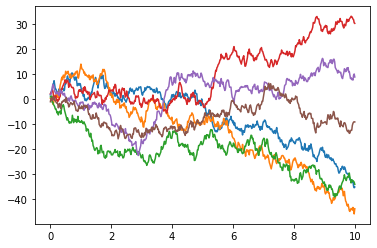

In [4]:
sns.reset_orig() ##unsets plt params to default

#Creating dummy data for plotting
randomgen = np.random.RandomState(0)
x = np.linspace(0, 10, 500)#creates an evenly spaced array with 500 elements from 0-10
y = np.cumsum(randomgen.randn(500, 6), 0) #creating dummy values for y
plt.plot(x, y)
plt.show()

Looks weird, right? The contrast is all off and the colors are not aesthetically pleasing at all. Now we'll look at the difference, just one line of code change will make. Seaborn's ```set()``` command sets the pyplot's default parameters to seaborn's defaults and the results are shown below. One thing to remember is that Seaborn is still running Matplotlib under the hood and that is why we still need to run pyplot's ```plot()``` and ```show()``` functions.
Using ```set()``` , the above plot becomes:

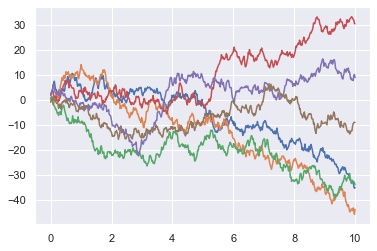

In [5]:
#sets plt params to seaborn defaults
sns.set()
plt.plot(x,y)
plt.show()

Now that's a treat for the eyes. Seaborn defaults plot your graph with better colors and in a higher resolution automatically. Seaborn also provides the ```set_style()``` interface to set a theme for your plots or create custom visualizations.
As of the latest version, you can use the following themes:
- Darkgrid(default)
- Whitegrid
- Dark
- White
- Ticks

Let's try and visualize the above plot using one of the themes:

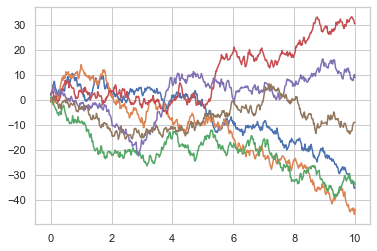

In [6]:
sns.set_style('whitegrid')
plt.plot(x,y)
plt.show()

But if you still want to be able to customize your plots even further, you can do that by passing dicionary values to the ```set_style()``` function. More on that [here](https://seaborn.pydata.org/tutorial/aesthetics.html).

### Ease Of Use
Seaborn makes it a lot easier to work directly with dataFrames and helps the data scientist focus on the data as a whole rather than focussing on how to plot the data. It might sound a little confusing right now but I will try my best to explain it below.

Seaborn installation comes with a few datasets to help aid in learning the library. You can run the ```get_dataset_names()``` command to see all the available datasets.

In [8]:
print(sns.get_dataset_names())

['anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'iris', 'mpg', 'planets', 'tips', 'titanic']


I'll use the **tips** and **iris** dataset for this tutorial. The ```load_dataset()``` command loads the pre-installed dataset into a pandas dataframe.

In [9]:
#Loads tips dataset into Df
df = sns.load_dataset('tips')
print(df.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


This dataset contains the tips paid by different customers and has other supporting data. Now, let's plot this data using seaborn. We'll use the ```relplot()``` interface to plot the data. Relplot is a seaborn interface to draw and find relationships between relational data. It can be of two kinds:
- scatter plot(default)
- line plot

It plots scatter by default but we can easily switch between the two kinds by passing ```kind``` in the relplot function. Let's look at an example:

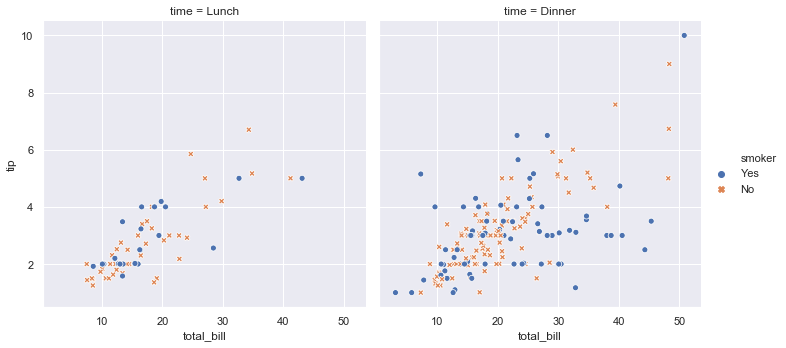

In [10]:
sns.set_style('darkgrid') #sets style back to seaborn default as we changed it to whitegrid above
sns.relplot(x="total_bill", y="tip",col = "time",hue="smoker", style="smoker",data=df)
plt.show()

Wait, What just happened here? 

We used the total_bill and tip columns to plot the x and y axis respectively and used the categorical variable smoker to set style(dots and crosses) and hue(color of points). Meanwhile "time" was used to split the plot using the col parameter. All this was done by using just a single relplot command and notice that unlike matplotlib, it automatically added a legend, implicitly took care of the style parameters and showed what we wanted to see from the data without worrying about the intricacies of plotting.

####  Easier Categorical Plots 
Let me showcase Seaborn's ease of use with another example. We learned about bar plots in class for categorical data. Suppose we wanted to find the average bill amount per day. Let's try to plot this in Matplotlib and Seaborn.


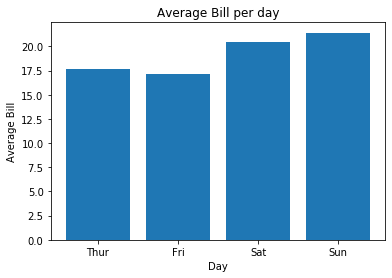

In [11]:
#Matplotlib
sns.reset_orig() ##unsets plt params to default
avg_bill = df.groupby("day").mean()
plt.bar([1,2,3,4],avg_bill["total_bill"],tick_label=avg_bill.index)
plt.xlabel("Day")
plt.ylabel("Average Bill")
plt.title("Average Bill per day")
plt.show()

Now, Let's do the same thing in Seaborn:

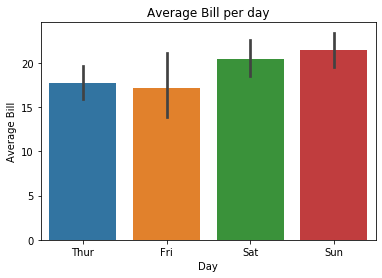

In [12]:
#Seaborn
bar_plot = sns.barplot(x = "day", y = "total_bill", data = df)
bar_plot.set(xlabel = "Day",title="Average Bill per day",ylabel="Average Bill")
plt.show()

Easy, right?

Seaborn automatically averages the values of y and calculates the confidence intervals(explained below) for the values if there are multiple values of y available for the same x. Moreover, unlike Matplotlib, we could pass the categorical variables directly for x-axis whereas in matplotlib, we had to pass a list of numbers first and then change the labels later. We were also able to set all the plot parameters in one line in Seaborn which is not the case in Matplotlib.

### Statistical Estimations Made Simple
We got a glimpse of Seaborn's power to plot statistical estimations while plotting the above bar chart. Now let's look a little more into this capability.

#### CI Plotting

If you are familiar with statistics, you would know that it consists of making inferences about a population using information available to us from a smaller subset of the population(a sample). This is also known as estimation and has some degree of error. To work with this, statisticians would say something like "There is a 95% chance that the population mean is within (sample mean ±  margin of error)". And this interval (sample mean ±  margin of error) is called 95% confidence interval for the mean.
If, let's say we have multiple values of y for a single x, seaborn will plot the mean of those values, calculate the   95% confidence interval and then plot them as error bars around the mean.
This is shown below for the iris dataset

  subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033
3     s11         18  stim  parietal -0.046134
4     s10         18  stim  parietal -0.037970


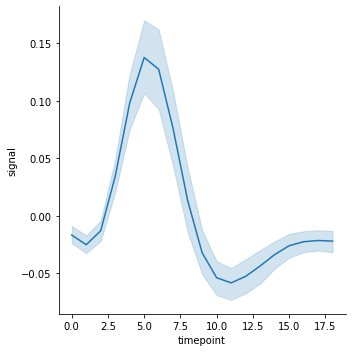

In [13]:
#loading the iris Dataset
iris_df = sns.load_dataset('fmri')
print(iris_df.head())
sns.relplot(x="timepoint", y="signal",
            kind="line", data=iris_df);
plt.show()

You can also disable the confidence intervals for the plot if you are just interested in the mean values. Moreover if you have an extremely large dataset, it is probably a good idea to disable CI calculation as it make your plotting slow. Notice the ```ci = None``` argument to the relplot function.

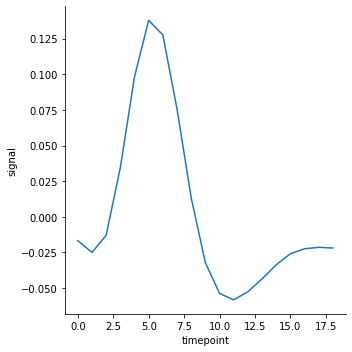

In [14]:
sns.relplot(x="timepoint", y="signal",
            kind="line", data=iris_df,ci=None);
plt.show()

We can also turn estimation off altogether by passing ```estimator=None``` to the relplot function, but that might cause completely unexpected results so I would not recommend doing that.

#### Regression Plotting
While we are at the topic of statistical estimation, seaborn can directly plot a regression line(with error bound) on top of the scatter-plot using ```lmplot()```. We can pass the ```order``` parameter to fit a non-linear regression model as well. lmplot although creates the scatter plot like relplot, there still are differences. For example lmplot() does not support changing 'style' of the plot points(dots and crosses above)

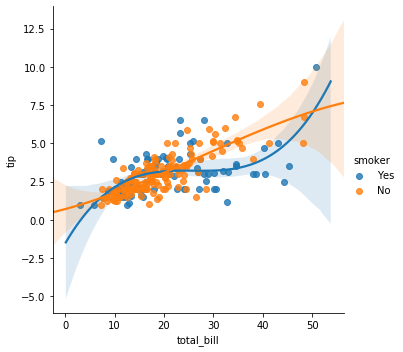

In [15]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",data=df,order=3);
plt.show()

## More Plots!

Well, since you have reached this far, you must be interested on some of the other plotting capabilities that Seaborn has to offer. We will go through a few scenarios and come up with a plot type to address that with Seaborn.
This, I believe will give you a broader perspective to seaborn and visualization as a whole. Although, I will only be covering a couple of plots, the ones I cover should be enough to give you a high level overview of the library.
The important thing to remember is that all the plots we make in seaborn can be made in matplotlib as well(Seaborn uses matplotlib under the hood). But, it does provide an easier syntax to create these plots.

### Pair Plots
Suppose you want to find out the relationship between all the variables in a dataset. You could ideally plot a scatter plot for all the variables separately but that is counterintuitive. A much easier way to do that is by using ```pair_plot()```. The diagonal plots are univariate as it won't make sense to plot total_bill with total_bill. Notice the ```palette``` argument in the plotting function. It is just used to change the color palette of the graph. Although a word of advice, please do not plot a pair_plot on a dataset with hundreds of columns. It can be an extremely time consuming process and in most cases, not useful at all.

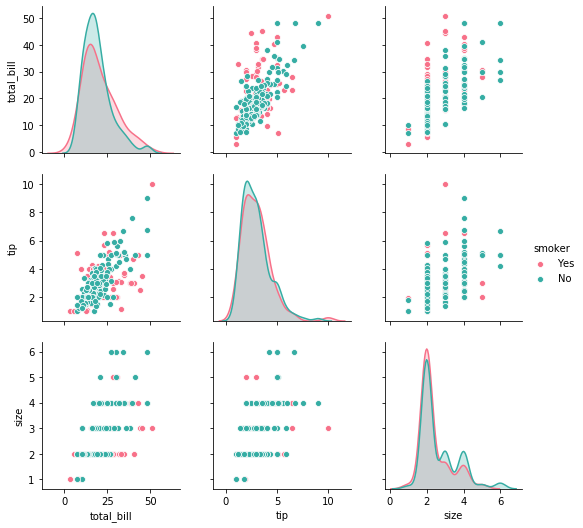

In [16]:
sns.pairplot(data= df,hue = "smoker",palette="husl")
plt.show()

### Histograms and Probability Distributions
#### Histograms


Suppose we want to find out the most popular bill amount for the restaurant in our tips Dataset. The best way to do that would be by using using a histogram. We have plotted hostograms using Matplotlib using the ```hist()``` function. With Seaborn, we use ```distplot()``` to do so as is shown below. Do not fret about kde parameter as I'll explain that in just a bit.

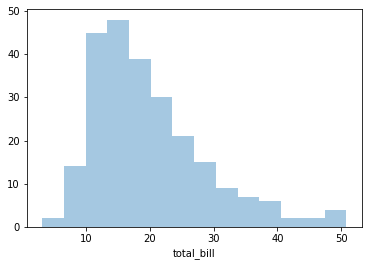

In [17]:
sns.distplot(df['total_bill'],kde=False)
plt.show()

#### Probability Distributions
The above histogram tells us that most people had their bill amounts between 10 and 20 and the number of people having total_bill < 10 and > 20 is much lesser. We can say that if we choose a person at random, the probability of their bill being in the range 10-20 would be the highest than being in any other range of the same size. But what if we wanted to find out the probability of a person being in the range 40-50 or any range for that matter? The best way to do that would be by plotting a probability density function for total_bill. This can be achieved through a kernel density estimate, for which, all we have to do is to pass ```hist = False``` in our above distplot

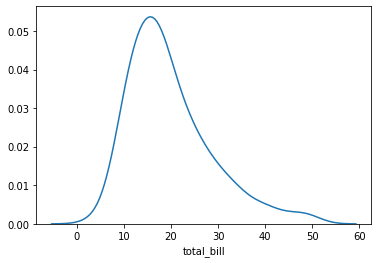

In [18]:
sns.distplot(df['total_bill'],hist=False)
plt.show()

If you notice the above plots have similar shapes but different y-axis. That is because kde displays the probability densities. Area under the curve for any range will give you the probability of of total_bill being in that range.WE can also get the above two graphs overlapped if we pass neither of ```hist=False``` and ```kde=False``` parameters.

### Box Plots and Violin Plots

#### Box Plot
We can also showcase the above data as a box plot find plot the quartiles and find the interquartile range of the total bill:

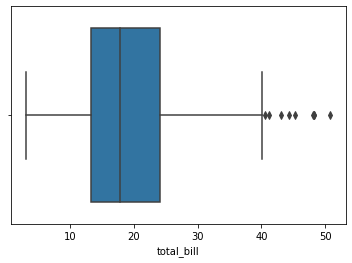

In [19]:
#Box Plot
sns.boxplot(x="total_bill", data=df)
plt.show()

#### Violin Plots
Violin Plots combine Box plots with density distributions. It looks as shown below. 

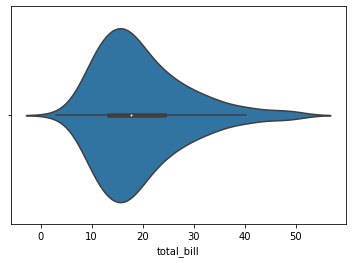

In [20]:
#plotting Violin Plot
sns.violinplot(x = "total_bill", data=df)
plt.show()

###  Further Reading
I hope that you were able to learn something of value from this tutorial and that I have been able to showcase how seaborn can be useful for a Data Scientist. But in the end it's a matter of preference and how you want to visualize your data. Please refer to the [seaborn](https://seaborn.pydata.org/) documentation to learn further about the library and find the plot that best suits you!

### References
- Seaborn Official Website: [https://seaborn.pydata.org/](https://seaborn.pydata.org/)
- Matplotlib: [(https://matplotlib.org/)]((https://matplotlib.org/))
- Aesthetics in Seaborn: [https://seaborn.pydata.org/tutorial/aesthetics](https://seaborn.pydata.org/tutorial/aesthetics.html)
- Jupyter Markdown guide: [https://medium.com](https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed) (Not related to the topic but very helpful!)

